In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Gradient descent and ascent

Gradient ascent and descent algorithms for find local minima and maxima of a differentiable function of several variables. This code will implement gradient descent for functions $ F : \mathbb{R}^2 \to \mathbb{R} $ and create plots that demonstrate the behaviour.

First we define the **gradient** of a function $ F : \mathbb{R}^2 \to \mathbb{R} $, written $ \nabla F$, is the function $ \nabla F : \mathbb{R}^2 \to \mathbb{R}$ given by

$$
\nabla F(\mathbf{v}) = \begin{pmatrix} \frac{\partial F}{\partial x}(\mathbf{v}) \\ \frac{\partial F}{\partial y}(\mathbf{v})\end{pmatrix}
$$

where $\frac{\partial F}{\partial x}(\mathbf{v})$ is the partial derivative defined by

$$
\frac{\partial F}{\partial x}(v_{1}, v_{2}) = \lim_{h \to 0}\frac{F(v_1 + h, v_{2}) - F(v_1, v_{2})}{h}
$$

and $ \frac{\partial F}{\partial y} $ is defined similarly.

The significance of the gradient is that at a point $\mathbf{v} \in \mathbb{R}^2$, the direction in which $F$ increases fastest is $\nabla F(\mathbf{v})$ and the direction in which $F$ decreases fastest is $ - \nabla F(\mathbf{v})$.

The gradient gives us a simple way of looking for a local maximum of a function $F: \mathbb{R}^2 \to \mathbb{R}$. Pick some point $\mathbf{a}_0$ to start off at, then move a small distance in the direction of $\nabla F( \mathbf{a}_0)$, taking you to a new point $\mathbf{a}_1$ with a bigger value of $F$, then move a small distance in the direction of $\nabla F(\mathbf{a}_1)$ to a new point $\mathbf{a}_2$, and so on.  This is gradient ascent.  (To see how the method works, imagine you are standing somewhere on a foggy mountain and want to climb to the top.  If you keep walking in the steepest uphill direction you can find, you may eventually get to the top, as long as there is only one peak).  To find a local minimum value of $F$ we can do the same thing except we move in the direction $- \nabla F$, since this is the direction in which $F$ decreases fastest - this is gradient *de*scent.

In this code, an approximation of the gradient function is used

$$\frac{f(a+h, b) - f(a, b)}{h} $$

which is an approximation of $\frac{\partial f}{\partial x}(a, b)$. The partial derivative with respect to $y$ is defined similarly for some small $h$.

In [1]:
def approx_grad(f, v, h):
    x, y = v

    x_partial = (f(x+h, y) - f(x, y)) / h
    y_partial = (f(x, y+h) - f(x, y)) / h

    return x_partial, y_partial

In [23]:
# Testing the gradient function with a simple function
def f(x, y):
    return ((x**2 + y -11)**2 + (x+y**2 - 6)**2)

The gradient descent algorithm for a function $ f : \mathbb{R} ^ 2 \to \mathbb{R}$ begins with a point $ \mathbf{a}_0 \in \mathbb{R} ^ 2$ and produced a sequence defined by

$$
\mathbf{a}_{i+1} \approx \mathbf{a}_i - k \nabla f(\mathbf{a}_i)
$$

where $k$ is a fixed small positive number called the *step* size.


In [18]:
def gradient_descent_sequence(f, a0, k, n):
    a = np.array(a0)
    sequence = [a.copy()]
    for i in range(n):
        grad = np.array(approx_grad(f, a, k))
        a = a - k * grad
        sequence.append(a.copy())
    return sequence

# Part 2 - Plotting sequence

In [51]:
a0 = (0, -3)
k = 0.005
n = 250
sequence = gradient_descent_sequence(f, a0, k, n)

In [52]:
x, y = zip(*sequence)

Now to plot the contour of the function to give more context to the above.

In [53]:
x_grid_vals = np.linspace(-5, 5, 100)
y_grid_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_grid_vals, y_grid_vals)
Z = np.vectorize(f)(X, Y)

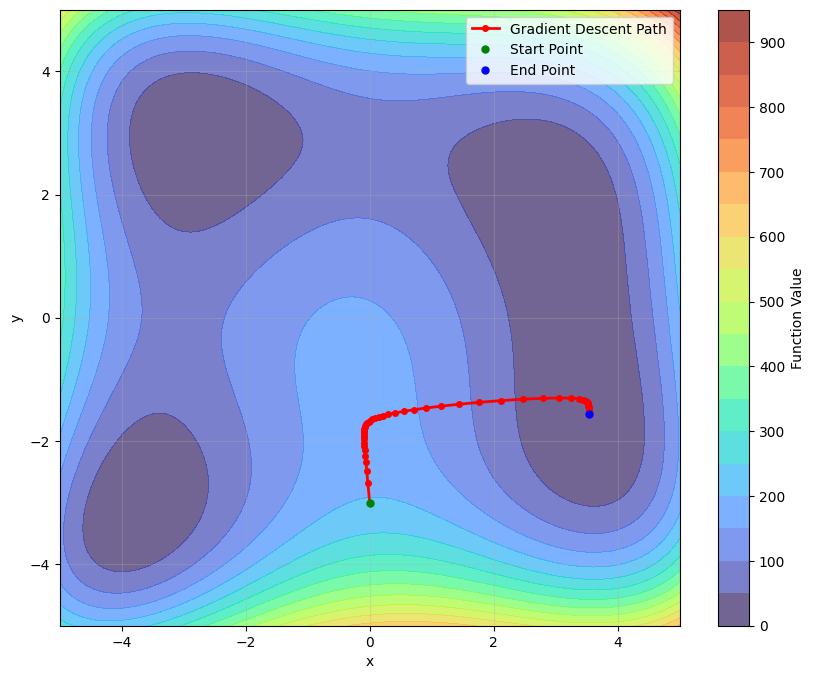

In [54]:
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 20, alpha=0.7, cmap='turbo')
plt.colorbar(label='Function Value')


plt.plot(x, y, 'ro-', linewidth=2, markersize=4, label='Gradient Descent Path')
plt.plot(x[0], y[0], 'go', markersize=5, label='Start Point')
plt.plot(x[-1], y[-1], 'bo', markersize=5, label='End Point')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
